In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zoo-animals-dataset/zoo.csv


In [3]:
zoo_data=pd.read_csv('/kaggle/input/zoo-animals-dataset/zoo.csv')

In [4]:
zoo_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3


In [5]:
zoo_data.tail()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
38,spider,0,0,1,0,0,0,1,1,0,1,1,0,8,0,0,0,7
39,snail,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
40,silkworm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
41,jellyfish,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,7
42,squid,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,7


In [6]:
zoo_data.shape

(43, 18)

In [7]:
zoo_data.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [8]:
zoo_data.duplicated().sum()

0

In [9]:
zoo_data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [10]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  43 non-null     object
 1   hair         43 non-null     int64 
 2   feathers     43 non-null     int64 
 3   eggs         43 non-null     int64 
 4   milk         43 non-null     int64 
 5   airborne     43 non-null     int64 
 6   aquatic      43 non-null     int64 
 7   predator     43 non-null     int64 
 8   toothed      43 non-null     int64 
 9   backbone     43 non-null     int64 
 10  breathes     43 non-null     int64 
 11  venomous     43 non-null     int64 
 12  fins         43 non-null     int64 
 13  legs         43 non-null     int64 
 14  tail         43 non-null     int64 
 15  domestic     43 non-null     int64 
 16  catsize      43 non-null     int64 
 17  class_type   43 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 6.2+ KB


In [11]:
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,43.000000,43.0,43.0,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.023256,0.0,1.0,0.0,0.162791,0.465116,0.302326,0.441860,0.581395,0.767442,0.116279,0.162791,3.209302,0.488372,0.116279,0.372093,4.837209
std,0.152499,0.0,0.0,0.0,0.373544,0.504685,0.464701,0.502486,0.499169,0.427463,0.324353,0.373544,2.587131,0.505781,0.324353,0.489083,1.462715
min,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,5.000000
75%,0.000000,0.0,1.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,6.000000
max,1.000000,0.0,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [12]:
zoo_data.nunique()

animal_name    43
hair            2
feathers        1
eggs            1
milk            1
airborne        2
aquatic         2
predator        2
toothed         2
backbone        2
breathes        2
venomous        2
fins            2
legs            5
tail            2
domestic        2
catsize         2
class_type      5
dtype: int64

In [13]:
zoo_data1=zoo_data[['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']]

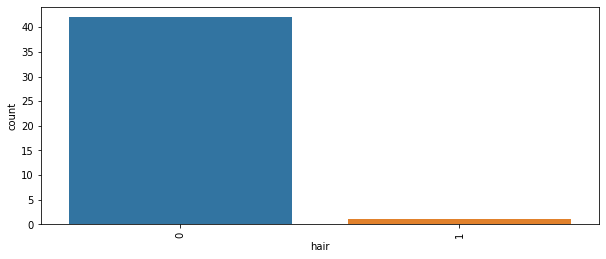

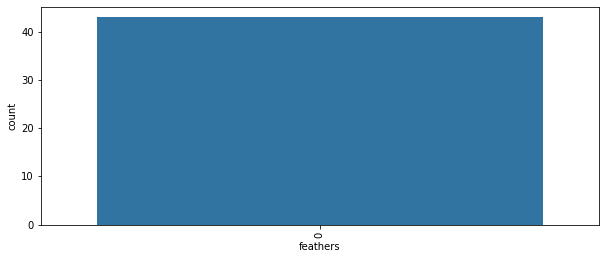

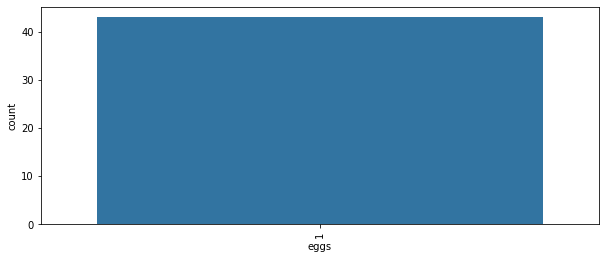

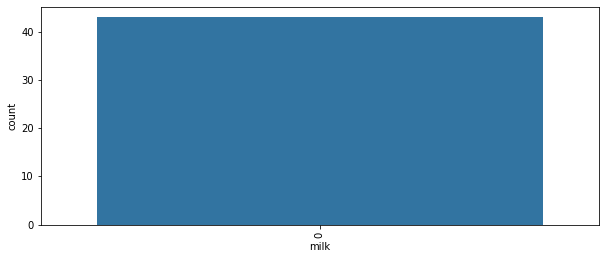

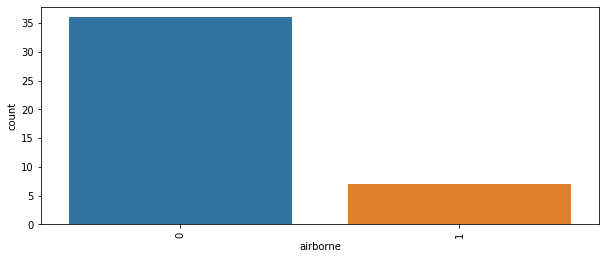

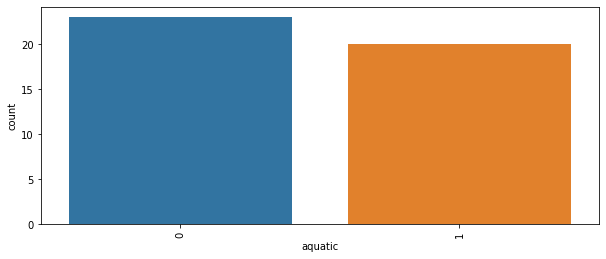

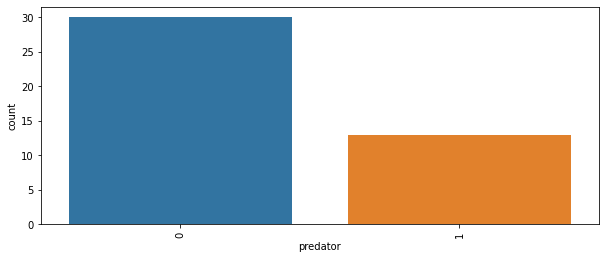

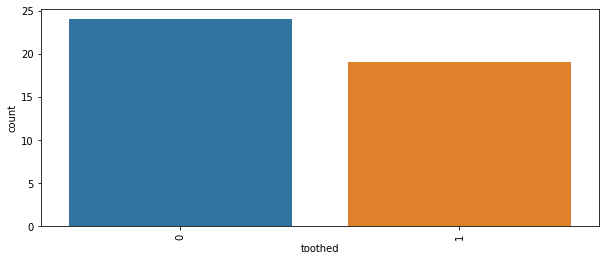

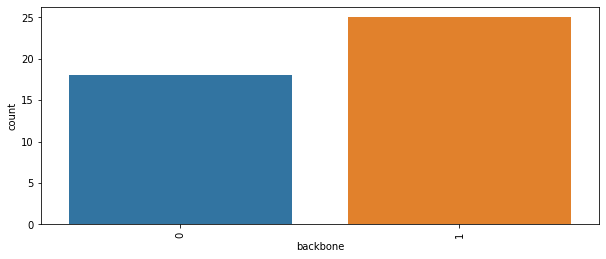

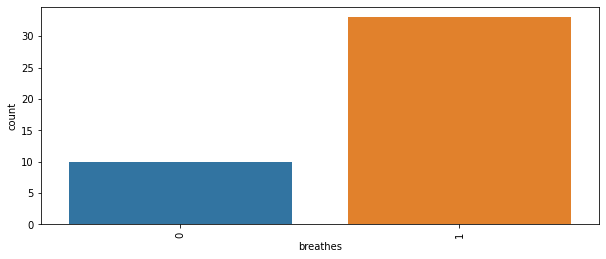

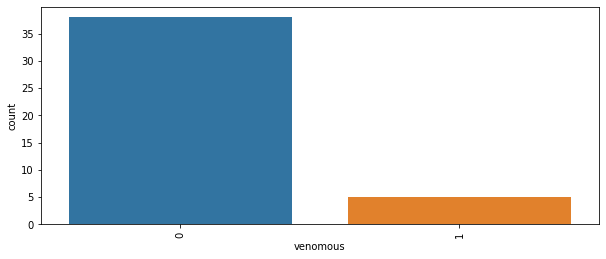

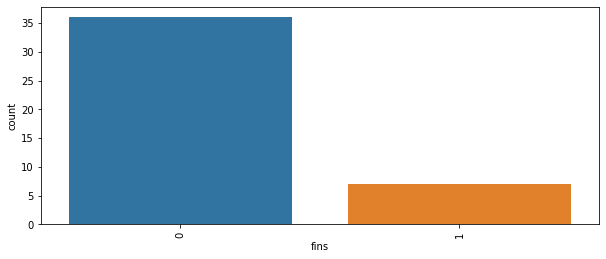

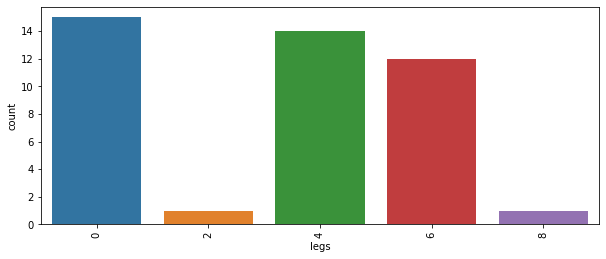

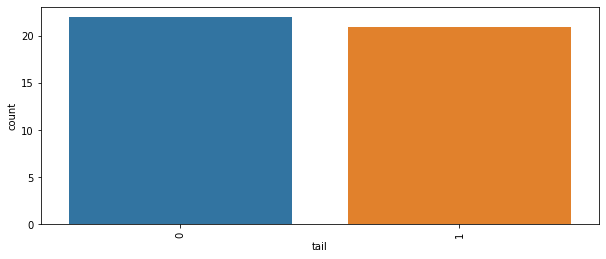

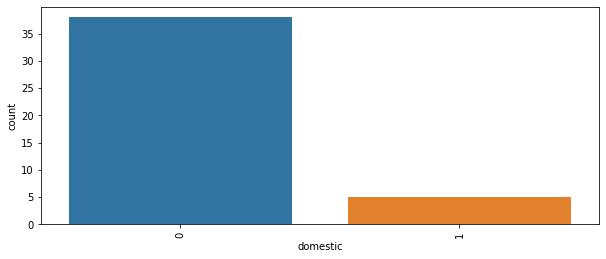

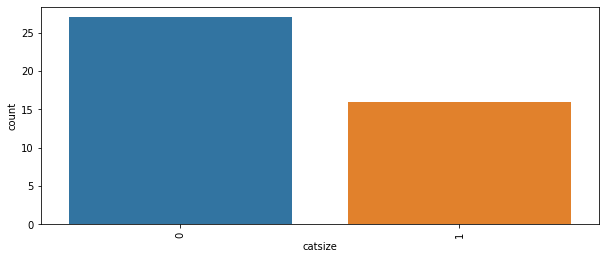

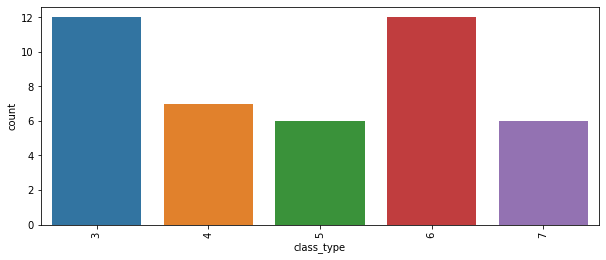

In [14]:
for i in zoo_data1.columns:
    plt.figure(figsize=(10,4))
    sns.countplot(zoo_data1[i])
    plt.xticks(rotation=90)
    plt.show()

In [15]:
import plotly.express as px

In [16]:
fig=px.histogram(zoo_data,x='class_type',color='class_type')
fig.show()

In [17]:
zoo_data=zoo_data.drop(columns=['animal_name','class_type'])

In [18]:
zoo_data.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1
1,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0
2,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1
3,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0
4,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0
5,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1
6,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1
7,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1
8,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1
9,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1


In [19]:
X=zoo_data.iloc[:,:]
print(X)

    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0      0         0     1     0         0        1         0        0   
1      0         0     1     0         0        0         0        1   
2      0         0     1     0         0        0         1        1   
3      0         0     1     0         0        0         1        1   
4      0         0     1     0         0        0         0        1   
5      0         0     1     0         0        0         1        1   
6      0         0     1     0         0        0         1        1   
7      0         0     1     0         0        0         1        1   
8      0         0     1     0         0        1         1        1   
9      0         0     1     0         0        1         1        1   
10     0         0     1     0         0        1         1        1   
11     0         0     1     0         0        0         0        1   
12     0         0     1     0         0        1         0     

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

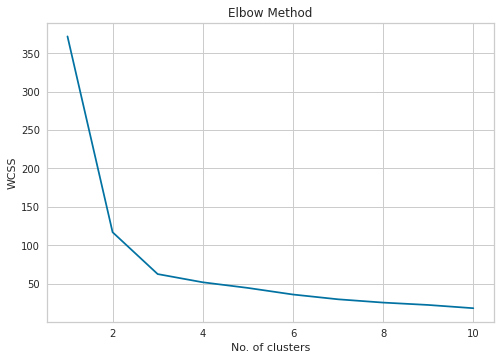

In [21]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method to determine the number of clusters to be formed:


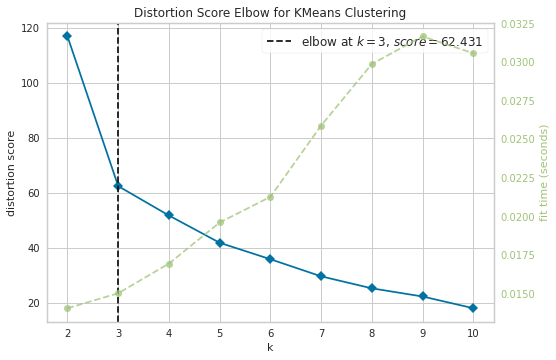

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
print('Elbow Method to determine the number of clusters to be formed:')
elbow_method=KElbowVisualizer(KMeans(),k=10)
elbow_method.fit(X)
elbow_method.show()

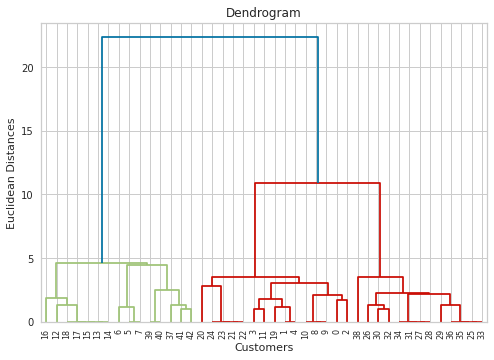

In [23]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [24]:
kmeans=KMeans(n_clusters=2,init="k-means++",n_init=10,tol=1e-04,random_state=42)
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=zoo_data.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])

In [25]:
fig2=px.line_polar(polar,r="value",theta="variable",color="label",line_close=True,height=500,width=500)
fig2.show()

In [26]:
kmeans=KMeans(n_clusters=5,init="k-means++",n_init=10,tol=1e-04,random_state=42)
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=zoo_data.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])

In [27]:
fig3=px.line_polar(polar,r="value",theta="variable",color="label",line_close=True,height=500,width=500)
fig3.show()

In [28]:
kmeans=KMeans(n_clusters=7,init="k-means++",n_init=10,tol=1e-04,random_state=42)
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=zoo_data.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])

In [29]:
fig4=px.line_polar(polar,r="value",theta="variable",color="label",line_close=True,height=500,width=500)
fig4.show()